# SOME-TOOLS for geographycal map plots
-----------------------------------------
Small tutorial for plotting routines with `some_tools` package and PyGMT library.
Here we show the possibilities of mapping with geographical map
Let's set up the imports ...

In [1]:
%matplotlib inline
import logging
import some_tools
from some_tools import plot_pygmt as PG
#
logging.basicConfig(format="%(name)s - %(funcName)s [%(levelname)s] %(message)s",
                    level=logging.INFO)
print("SOME-tools version:  %s" % some_tools.__version__)


SOME-tools version:  0.0.5


From version `0.0.2` the `plot_pygmt` module, offers API for the geographical part: _epicentral maps_, _depth sections_, and _elevation profile_.

- __SomeMapping__ : in charge of plotting maps and sections
- __SomeSection__ : in charge of plotting depth sections with hypocenters
- __SomeElevation__ : in charge of plotting depth sections with hypocenters

Here we'll focus on __SomeMapping__!!!
First, let's initialize the class API and load the `GAPSS` experiment dataset in southern tuscany (Larderello-Travale geothermal field).

In [2]:
SM = PG.SomeMap("./database/gapss_initial_events.csv")
dataframe = SM.get_database()
dataframe.head()

some_tools.io - _pd_select_columns [WARNING] Only MANDATORY field extracted. Missing additional ['OT', 'MAGTYPE']
some_tools.plot_pygmt - _define_plot_parameters [INFO] Setting-up the GMT section plot parameters! (overriding if already present)
some_tools.plot_pygmt - _auto_scale_plot [WARNING] Auto scaling the class REGION-plot attributes!
some_tools.plot_pygmt - _auto_frame_plot [WARNING] Auto scaling the class FRAME-plot attributes!


LON   DEP    MAG       LAT           ID
0  10.98950  5.00  1.399  43.13250  sometools_1
1  11.34950  5.09  1.969  43.29883  sometools_2
2  11.20517  4.32  1.589  43.03917  sometools_3
3  10.91067  5.84  1.543  43.19617  sometools_4
4  11.33817  9.70  1.682  43.30317  sometools_5

The `SomeMap` class must be initialized with a DATASET. It can optionally take a GRID-FILE (elevation), and a specific CONFIGURATION-FILE (please refer to the ad-hoc book in this folder). All of these attributes may be add in a later stage with the dedicated modules:

- `set_database`
- `set_gridfile`
- `set_configfile`

The class loader will take into account an event catalog. The format supported are `pandas.DataFrame`, `geopandas.GeoDataFrame`, or a path to a `*csv*` file. The loader will seek for the following columns/keys (mandatory field with `*`):

- `ID*`: **non-case sensitive** possible variation `["id", "event_id", "eqid", "eq_id", "evtid", "#"]`
- `OT`: **non-case sensitive** possible variation `["ot", "origin_time", "utc_datetime", "evtdatetime", "utc"]`
- `LON*`: **non-case sensitive** possible variation `["lon", "longitude", "ev_longitude", "evlo"]`
- `LAT*`: **non-case sensitive** possible variation `["lat", "latitude", "ev_latitude", "evla"]`
- `DEPTH*`: **non-case sensitive** possible variation `["dep", "depth", "ev_depth", "evdp"]`
- `MAG*`: **non-case sensitive** possible variation `["mag", "magnitude", "ev_magnitude", "evmag"]`
- `MAGTYPE`: **non-case sensitive** possible variation`["magtype", "mag_type", "magnitude_type", "evmagtype"]`

If the `ID` field, if missing, will be automatically filled by the class.
All of the mandatory fields must be present in the input database. An error will raise if not.
The internal dataframe instance is converted as a `pandas.DataFrame`.

------------------------------------------------------------------------------------------------

Now let's do some plotting, using the defaults parameter

some_tools.plot_pygmt - plot_map [INFO] Creating MAP for 1740 events ...


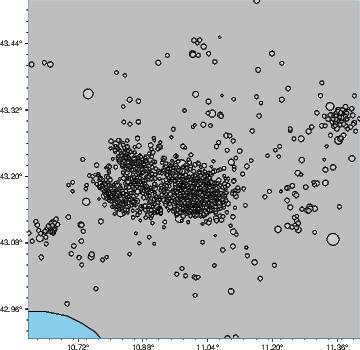

In [3]:
SM.plot_map()

As you see, the default setting of `auto_scale` fix the region based on the max/min lon/lat of our catalog. The `auto_frame` option as well automatically finds the eye-pleaseant ratio for the axis (major and minor ticks).

Now let's add a `grid` file (DEM) and plot it again

some_tools.plot_pygmt - _load_grid [INFO] Setting grid file ... ./database/LTGF.nc
some_tools.plot_pygmt - plot_map [INFO] Creating MAP for 1740 events ...


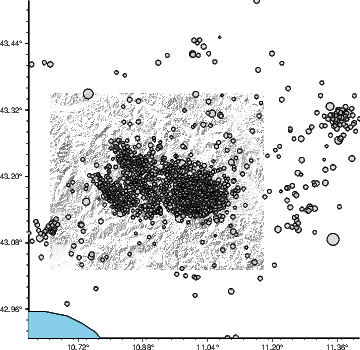

In [4]:
SM.set_gridfile("./database/LTGF.nc")  # if the set_gridfile is called without arguments, the classic earth_relief grid is loaded
SM.plot_map()

So now the automatic frame is a bit too wide, let's shrink it! Plus, let's change the event color to a more vibrant green!

some_tools.plot_pygmt - _update [INFO] Updating plotting parameters
some_tools.plot_pygmt - _define_plot_parameters [INFO] Setting-up the GMT section plot parameters! (overriding if already present)
some_tools.plot_pygmt - _auto_frame_plot [WARNING] Auto scaling the class FRAME-plot attributes!
some_tools.plot_pygmt - plot_map [INFO] Creating MAP for 1740 events ...


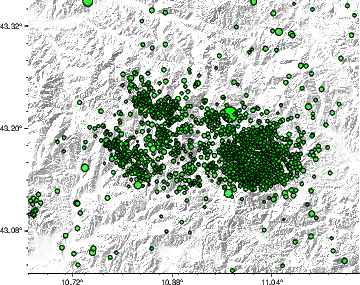

In [10]:
SM.update_configuration(plot_region=[10.65, 11.18, 43.03, 43.35], auto_scale=False)

map_plot_dict = {
  "event_color": "green@30",
  "event_size": 0.05,       # float: represent a mag 1 eventsize if scale_magnitude==True
  "scale_magnitude": True,  # bool: if True plot scaled event
  "show_grid": True
}

SM.plot_map(plot_config=map_plot_dict)

Much better right?!

Please remember that you can use also a path to a `*yml` config file both for the `plot_config` parameter of the `plot_map` method, but also for the `set_configfile` method. For the `update_configuration` method, please use only key-args only.

Please refer to the `ConfigFile_README.md` document to see the package defaults and the possible options